https://www.kaggle.com/datasets/bhrt97/hr-analytics-classification?select=train_LZdllcl.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("/content/train_LZdllcl.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [5]:
df.shape

(54808, 14)

In [6]:
df.isna().sum()
#Есть пустые ячейки в столбце образование и рейтинг за прошлый год

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
df = df.drop_duplicates()
df.shape

(54808, 14)

In [8]:
list(df.columns)


['employee_id',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

employee_id - ID сотрудника

department - отдел сотрудника

region - регион сотрудника

education - уровень образования

gender - гендер

recruitment_channel - канал по которому набирается сотрудник

no_of_trainings - количество тренировок сотрудника по разным умениям

age - возраст

previous_year_rating - рейтинг за прошлый год

length_of_service - стаж работы

KPIs_met > 80% - ключевые показатели больше 80% ?

awards_won - выигрывал ли награды

avg_training_score - средний балл сотрудника в обучении

is_promoted - будет ли повышен? - целевая переменная



In [9]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

employee_id, region, recruitment_channel уберем из данных, тк они бессмысленны

In [10]:
df = df.drop(columns = ['employee_id', 'region', 'recruitment_channel'])

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

department              0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [13]:
df.shape

(48660, 11)

In [14]:
df['education'].value_counts()

education
Bachelor's          33404
Master's & above    14798
Below Secondary       458
Name: count, dtype: int64

In [15]:
df['department'].value_counts()

department
Sales & Marketing    14239
Operations           10547
Procurement           6641
Technology            6502
Analytics             4610
Finance               2219
HR                    2142
R&D                    893
Legal                  867
Name: count, dtype: int64

In [16]:
df = pd.get_dummies(df, columns=['education','gender'])


In [17]:
df

,department,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
0,Sales & Marketing,1,35,5.0,8,1,0,49,0,False,False,True,True,False
1,Operations,1,30,5.0,4,0,0,60,0,True,False,False,False,True
2,Sales & Marketing,1,34,3.0,7,0,0,50,0,True,False,False,False,True
3,Sales & Marketing,2,39,1.0,10,0,0,50,0,True,False,False,False,True
4,Technology,1,45,3.0,2,0,0,73,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,2,31,1.0,2,0,0,49,0,True,False,False,False,True
54803,Technology,1,48,3.0,17,0,0,78,0,True,False,False,False,True
54804,Operations,1,37,2.0,6,0,0,56,0,False,False,True,True,False
54805,Analytics,1,27,5.0,3,1,0,79,0,True,False,False,False,True


In [18]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['department'])
df['department'] = label_encoder.transform(df['department'])



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   department                  48660 non-null  int64  
 1   no_of_trainings             48660 non-null  int64  
 2   age                         48660 non-null  int64  
 3   previous_year_rating        48660 non-null  float64
 4   length_of_service           48660 non-null  int64  
 5   KPIs_met >80%               48660 non-null  int64  
 6   awards_won?                 48660 non-null  int64  
 7   avg_training_score          48660 non-null  int64  
 8   is_promoted                 48660 non-null  int64  
 9   education_Bachelor's        48660 non-null  bool   
 10  education_Below Secondary   48660 non-null  bool   
 11  education_Master's & above  48660 non-null  bool   
 12  gender_f                    48660 non-null  bool   
 13  gender_m                    48660 no

In [20]:
df.describe()


,department,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,4.963913,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,2.484464,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,0.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,4.000000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,5.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,7.000000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,8.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


In [21]:
df.corr()

,department,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
department,1.000000,0.013762,0.088488,-0.141178,0.061436,-0.086974,-0.001781,-0.228819,0.000990,-0.048561,-0.024198,0.054051,0.034020,-0.034020
no_of_trainings,0.013762,1.000000,-0.083590,-0.064236,-0.055440,-0.046673,-0.008528,0.042033,-0.025006,0.035689,0.003724,-0.036773,-0.085456,0.085456
age,0.088488,-0.083590,1.000000,0.005068,0.620348,-0.033886,-0.010335,-0.066214,-0.022412,-0.303182,-0.148553,0.336930,0.002446,-0.002446
previous_year_rating,-0.141178,-0.064236,0.005068,1.000000,-0.001252,0.352434,0.027920,0.070041,0.158715,-0.015555,0.012083,0.013150,0.022828,-0.022828
length_of_service,0.061436,-0.055440,0.620348,-0.001252,1.000000,-0.089081,-0.043750,-0.047461,-0.014267,-0.190874,-0.094436,0.212312,0.011082,-0.011082
KPIs_met >80%,-0.086974,-0.046673,-0.033886,0.352434,-0.089081,1.000000,0.095208,0.074114,0.219933,-0.006903,0.009214,0.005028,0.038172,-0.038172
awards_won?,-0.001781,-0.008528,-0.010335,0.027920,-0.043750,0.095208,1.000000,0.073132,0.196971,0.001776,0.000569,-0.001910,-0.002275,0.002275
avg_training_score,-0.228819,0.042033,-0.066214,0.070041,-0.047461,0.074114,0.073132,1.000000,0.179494,-0.022423,0.008878,0.020750,0.017835,-0.017835
is_promoted,0.000990,-0.025006,-0.022412,0.158715,-0.014267,0.219933,0.196971,0.179494,1.000000,-0.027066,-0.002895,0.027902,0.011909,-0.011909
education_Bachelor's,-0.048561,0.035689,-0.303182,-0.015555,-0.190874,-0.006903,0.001776,-0.022423,-0.027066,1.000000,-0.144238,-0.978192,-0.026607,0.026607


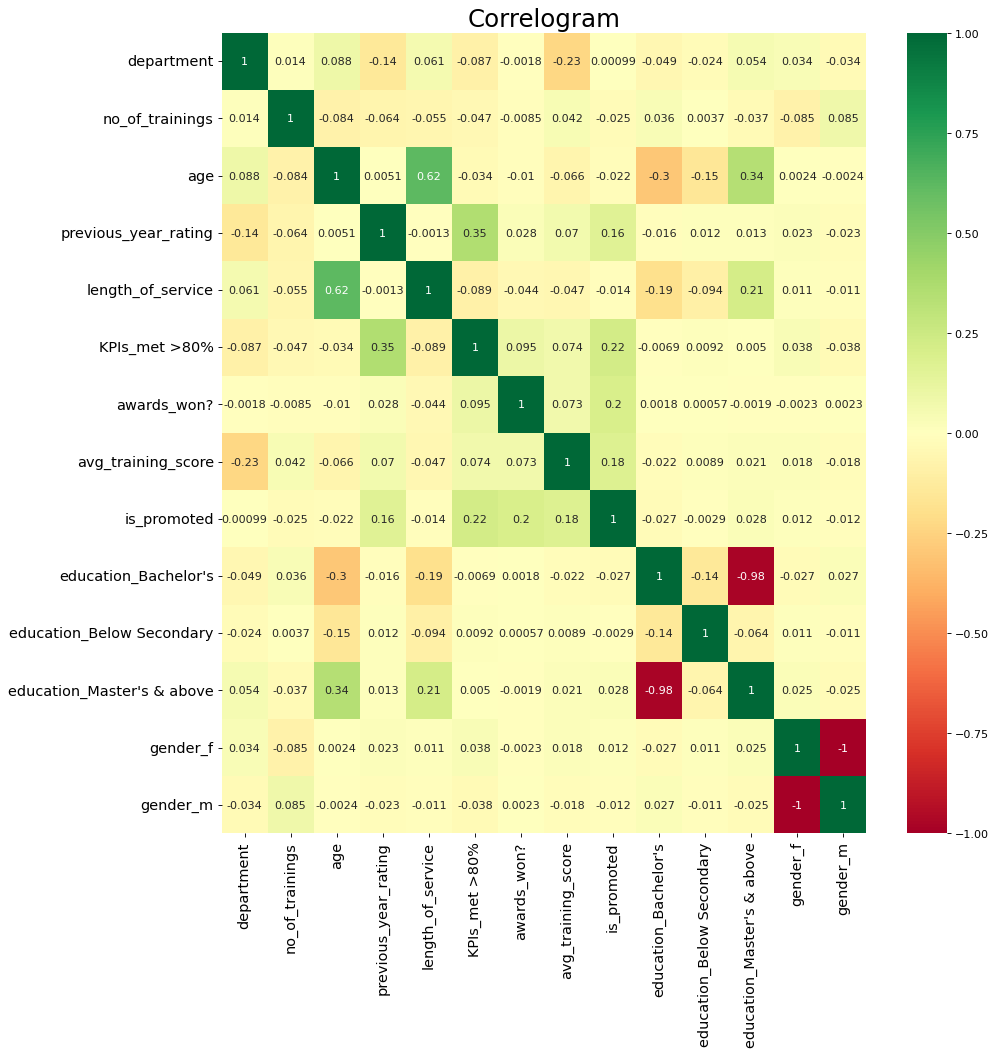

In [22]:
plt.figure(figsize=(13,13), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

Аge коррелирует с образованием магистра, это и стоило ожидать, тк магистра получают с возрастом. Также возраст коррелирует со стажем работы, что тоже очевидно.

Значение целевой переменной зависит от успехов прошлого года, что ожидаемо

Text(0.5, 1.0, 'avg_training_score')

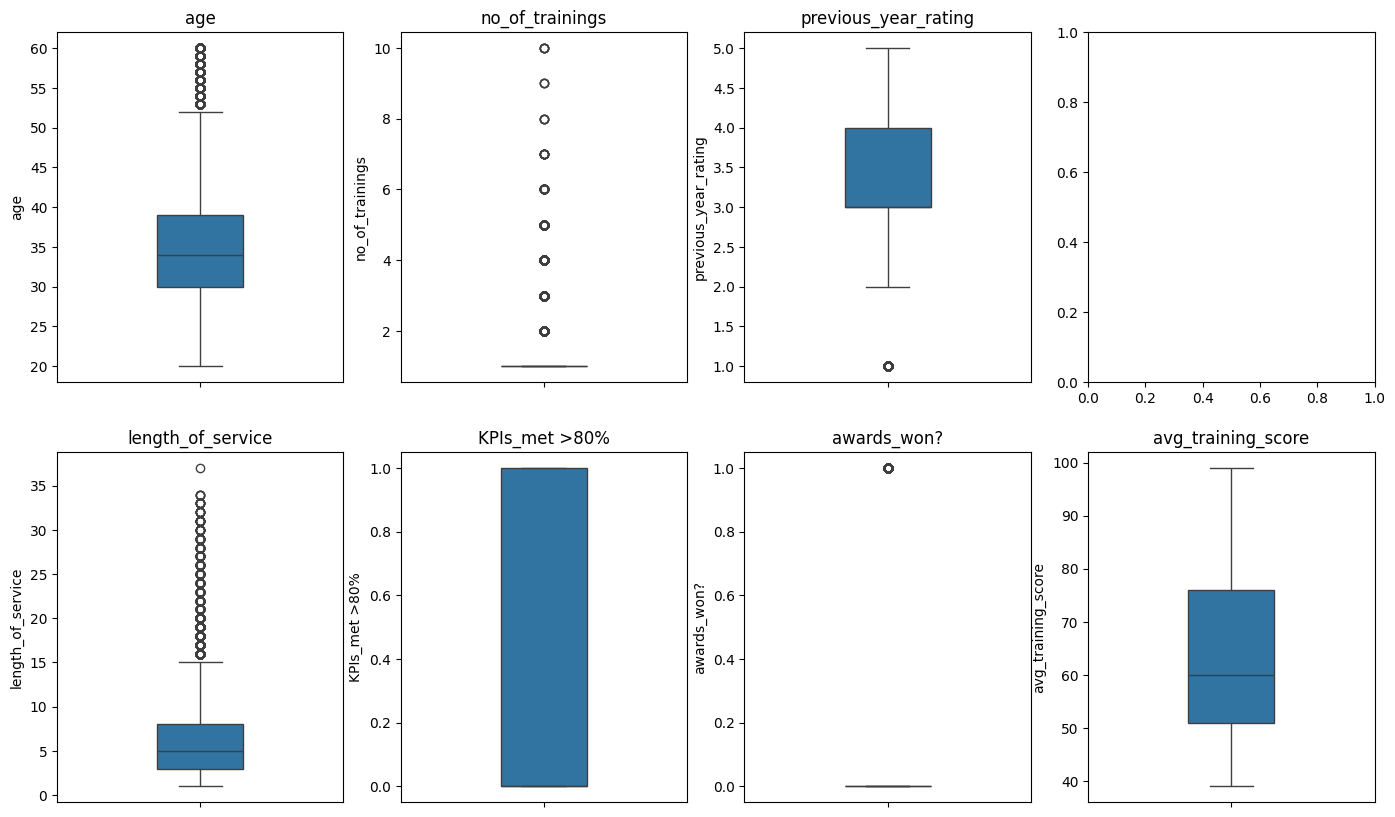

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(17,10))

sns.boxplot(df['age'], ax=axes[0,0], width=0.3).set_title('age')
sns.boxplot(df['no_of_trainings'], ax=axes[0,1], width=0.3).set_title('no_of_trainings')
sns.boxplot(df['previous_year_rating'], ax=axes[0,2], width=0.3).set_title('previous_year_rating')
sns.boxplot(df['length_of_service'], ax=axes[1,0], width=0.3).set_title('length_of_service')
sns.boxplot(df['KPIs_met >80%'], ax=axes[1,1], width=0.3).set_title('KPIs_met >80%')
sns.boxplot(df['awards_won?'], ax=axes[1,2], width=0.3).set_title('awards_won?')
sns.boxplot(df['avg_training_score'], ax=axes[1,3], width=0.3).set_title('avg_training_score')


In [ ]:
qq = df[df['is_promoted'] == 1]
qq

Text(0.5, 1.0, 'avg_training_score')

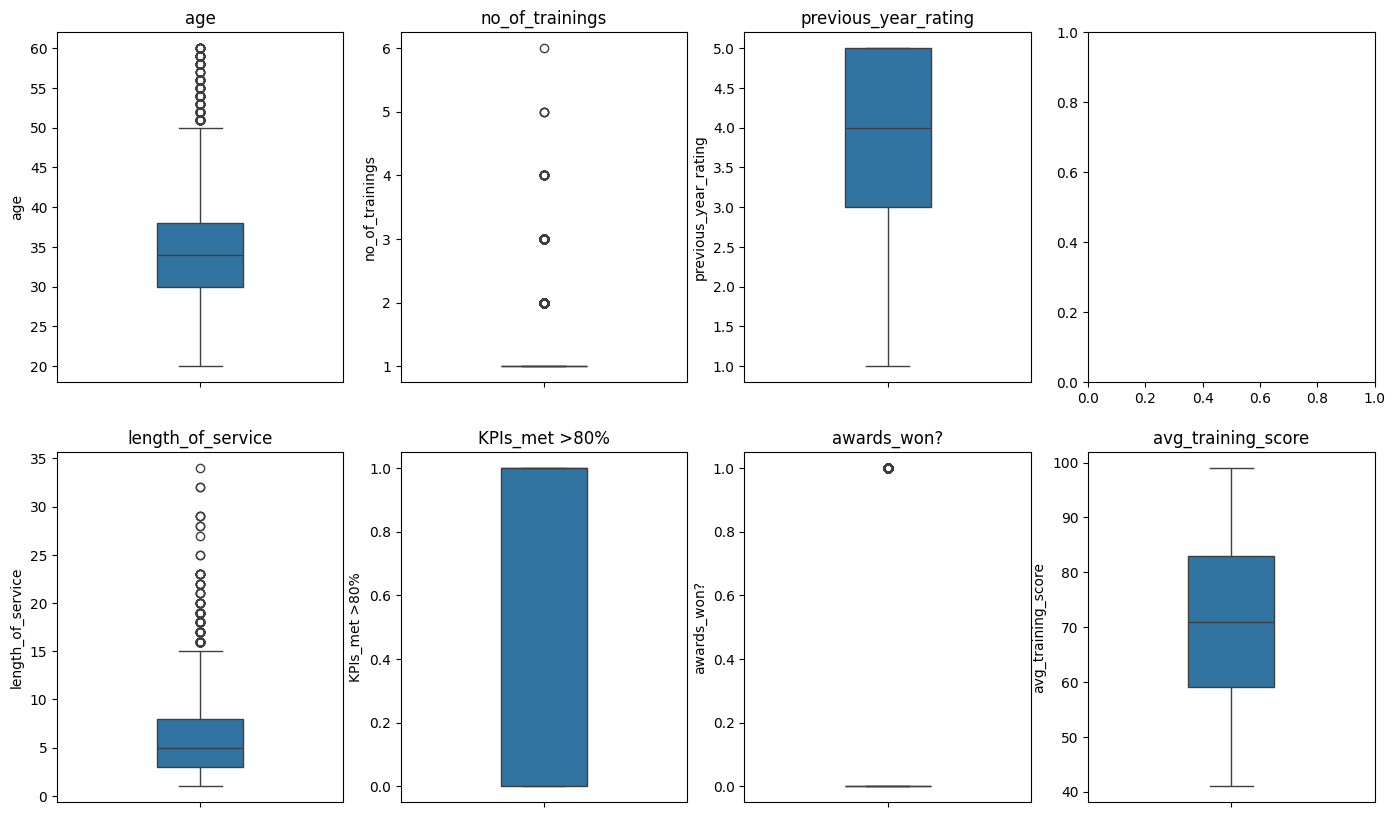

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(17,10))

sns.boxplot(qq['age'], ax=axes[0,0], width=0.3).set_title('age')
sns.boxplot(qq['no_of_trainings'], ax=axes[0,1], width=0.3).set_title('no_of_trainings')
sns.boxplot(qq['previous_year_rating'], ax=axes[0,2], width=0.3).set_title('previous_year_rating')
sns.boxplot(qq['length_of_service'], ax=axes[1,0], width=0.3).set_title('length_of_service')
sns.boxplot(qq['KPIs_met >80%'], ax=axes[1,1], width=0.3).set_title('KPIs_met >80%')
sns.boxplot(qq['awards_won?'], ax=axes[1,2], width=0.3).set_title('awards_won?')
sns.boxplot(qq['avg_training_score'], ax=axes[1,3], width=0.3).set_title('avg_training_score')

Регрессия


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [25]:
%%time

X = df.drop(['is_promoted'], axis=1)
y = df['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
answers_pred = model.predict(X_test)


CPU times: user 561 ms, sys: 303 ms, total: 863 ms
Wall time: 510 ms


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model.coef_


array([[ 0.00948583, -0.72426889, -0.07379082,  0.05894936,  0.07147548,
         1.75672427,  1.35027263,  0.02666493, -0.73540087, -0.28356922,
        -0.21295447, -0.66551675, -0.56640782]])

In [27]:
model.intercept_


array([-1.23434801])

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, answers_pred))


0.9169064255377449


In [29]:
print(X_train.shape)
print(y_train.shape)

(34062, 13)
(34062,)


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

array([[13342,    32],
       [ 1181,    43]])

In [31]:
df_y = pd.DataFrame(y_test)
df_y.value_counts()

is_promoted
0              13374
1               1224
Name: count, dtype: int64

In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 13342
FP: 32
FN: 1181
TP: 43


In [33]:
accuracy_score(y_test, answers_pred)


0.9169064255377449

In [34]:
recall_score(y_test, answers_pred)


0.035130718954248366

In [35]:
precision_score(y_test, answers_pred)


0.5733333333333334

In [36]:
f1_score(y_test, answers_pred)


0.06620477290223249

In [37]:
pdf = pd.read_csv('/content/test_2umaH9m.csv')
pdf

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
